<a href="https://colab.research.google.com/github/DaanaGtz/Estadistica/blob/main/eii_u3_p_22150551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

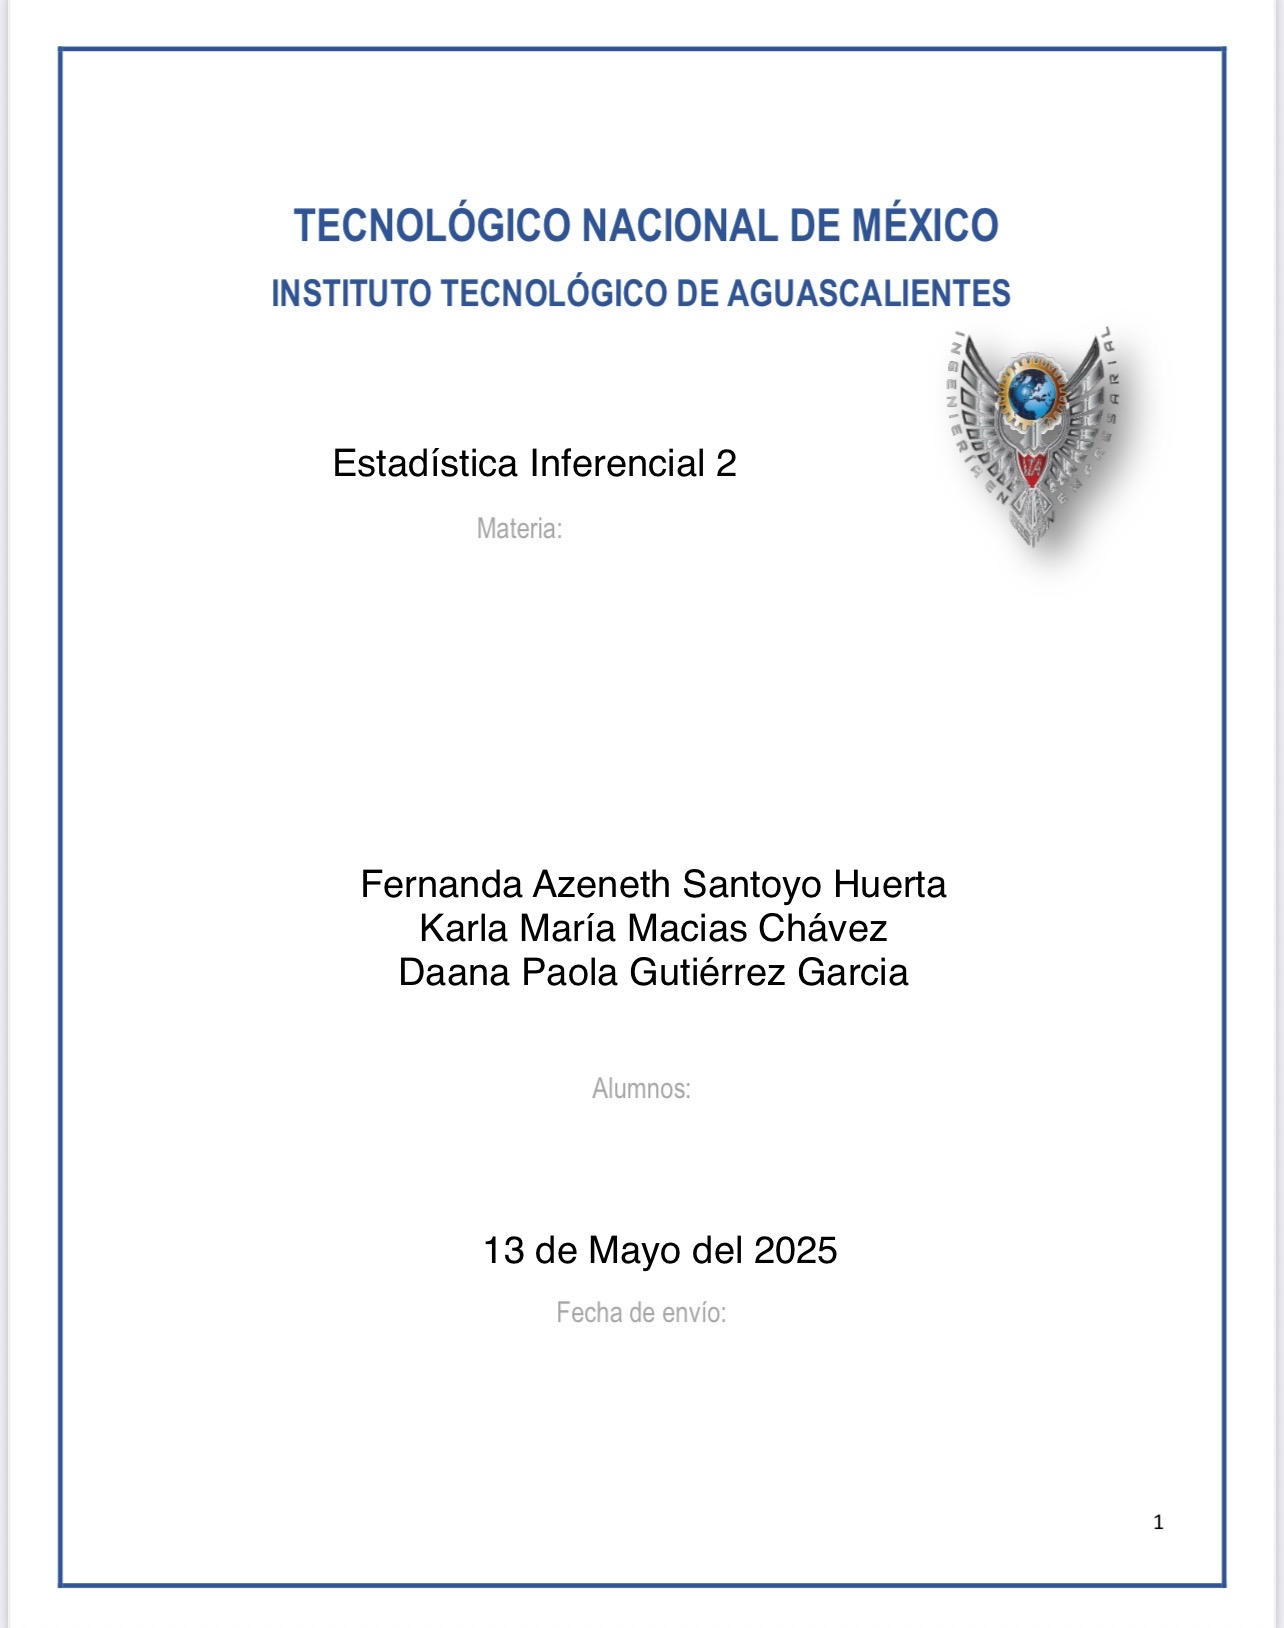

# Introducción
En el panorama financiero contemporáneo, el análisis de datos se erige como una herramienta fundamental para desentrañar la dinámica de los mercados. Las acciones de corporaciones líderes en el sector de pagos, como Visa (V) y Mastercard (MA), son monitoreadas de cerca debido a su significativo impacto en la economía global. Este proyecto se enfoca en investigar el comportamiento de los precios de cierre de estas compañías a lo largo del tiempo, examinando sus tendencias, patrones y posibles interdependencias.

Mediante el uso de Python y librerías especializadas en el análisis de series temporales, se ha recopilado información detallada desde inicios de 2024 hasta abril de 2025. El propósito de este estudio no se limita a la descripción de los datos, sino que busca comprender su evolución, la viabilidad de predecir su comportamiento futuro y la existencia de alguna relación causal entre ambas empresas. Para alcanzar este objetivo, se emplean técnicas estadísticas como promedios móviles, pruebas de estacionariedad, descomposición de tendencias y modelos de predicción como Prophet.

En esencia, este trabajo aspira a ofrecer una perspectiva más precisa sobre la fluctuación diaria de los precios de estas acciones y cómo estas variaciones pueden modelarse de manera fiable, contribuyendo tanto al conocimiento teórico como a la práctica financiera en el ámbito de las empresas de procesamiento de pagos.

# Hipótesis
Los precios de cierre diarios de las acciones de Visa (V) y Mastercard (MA) durante el periodo comprendido entre inicios de 2024 y abril de 2025 presentarán tendencias y patrones identificables, y existirá una relación de influencia mutua (causalidad en el sentido de Granger) entre sus movimientos, reflejando la interdependencia dentro del sector de procesamiento de pagos.



#Marco Teorico
El análisis de series temporales es un campo de la estadística y la econometría dedicado al estudio de datos secuenciados en el tiempo. Su objetivo primordial es comprender la dinámica subyacente de estos datos, identificar patrones significativos, modelar su comportamiento pasado y, crucialmente, predecir valores futuros. Este marco teórico se construye sobre la idea de que los valores observados en una serie temporal no son independientes, sino que están correlacionados a través del tiempo.
La relación entre estos componentes puede ser aditiva

(Y
t
​
 =T
t
​
 +S
t
​
 +C
t
​
 +I
t
​
 ) o multiplicativa (Y
t
​
 =T
t
​
 ×S
t
​
 ×C
t
​
 ×I
t
​
 ), dependiendo de cómo interactúen a lo largo del tiempo.



# Metodologia

La metodología que se utiliza para analizar los precios de cierre de Visa (V) y Mastercard (MA) desde inicios de 2024 hasta abril de 2025, con el objetivo de explorar sus tendencias, patrones y posibles relaciones causales, podría comprender los siguientes pasos:


Recolección de Datos: Obtener series de tiempo históricas de los precios de cierre diarios ajustados por dividendos y splits para las acciones de Visa (V) y Mastercard (MA) desde inicios de 2024 hasta abril de 2025.

Se utilizarían fuentes de datos financieros confiables (e.g., Finance, proveedores de datos de mercado).
Limpieza y Preprocesamiento:
Verificar y manejar posibles valores faltantes (imputación con métodos apropiados si es necesario).

Identificar y analizar valores atípicos (outliers) que puedan distorsionar el análisis. Se podrían aplicar técnicas estadísticas o visuales para su detección y, dependiendo de su naturaleza, considerar su eliminación o ajuste.
Asegurar que las series de tiempo estén alineadas por fecha.

In [ ]:
#1.Seleccionar una marca y obtener los datos:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='V',            # tickers: Visa: 	Visa Common Stock
    start='2024-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,V_Open,V_High,V_Low,V_Close,V_Adj Close,V_Volume
Date,,,,,,
2024-01-02,259.609985,260.089996,257.670013,258.869995,256.474762,5471000
2024-01-03,258.549988,258.859985,256.859985,257.980011,255.592987,4148300
2024-01-04,258.070007,261.040009,258.000000,259.609985,257.207886,3843000
2024-01-05,260.779999,261.459991,258.750000,259.690002,257.287170,3748400
2024-01-08,260.940002,262.619995,259.950012,262.540009,260.110779,4659000
...,...,...,...,...,...,...
2025-03-25,344.559998,345.529999,340.670013,344.619995,344.619995,3931200
2025-03-26,345.989990,347.380005,343.000000,344.179993,344.179993,6187100
2025-03-27,344.000000,350.839996,343.320007,349.859985,349.859985,7254800


In [ ]:
pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = '0G16GIZ6K04UHXKJ'   # esta es mía, no la uses o habrá problemas
#Clave AZENETH
# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de MSFT
ticker = 'V'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,V_Open,V_High,V_Low,V_Close,V_Volume
date,,,,,
2025-04-01,350.44,350.4500,342.570,346.35,7473329.0
2025-03-31,339.35,351.8600,334.490,350.46,9950762.0
2025-03-28,349.19,351.6150,341.605,342.85,5687616.0
2025-03-27,344.00,350.8400,343.320,349.86,7254807.0
2025-03-26,345.99,347.3800,343.000,344.18,6187574.0
...,...,...,...,...,...
2024-01-08,260.94,262.6200,259.950,262.54,4659030.0
2024-01-05,260.78,261.4599,258.750,259.69,3723363.0
2024-01-04,258.07,261.0400,258.000,259.61,3842976.0


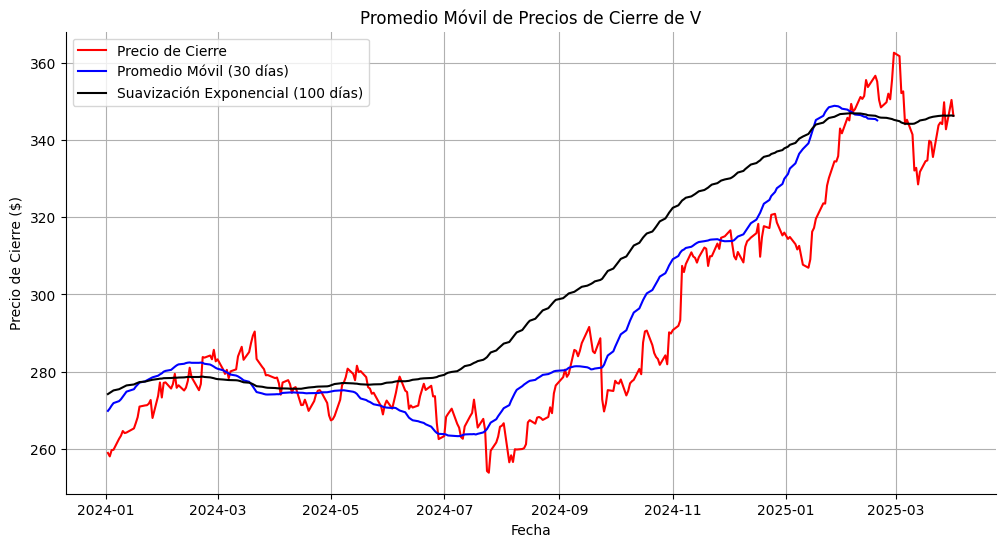

In [ ]:
#Graficar la serie de tiempo:
# Promedio Móvil Simple
ventana_sma = 30
df['SMA'] = df['V_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['V_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['V_Close'], label='Precio de Cierre', color='red')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='blue')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='black')
plt.title('Promedio Móvil de Precios de Cierre de V')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Precio de Cierre (línea roja): Esta línea representa el precio de la acción de Visa al final de cada día durante el periodo mostrado (aproximadamente desde enero de 2024 hasta marzo de 2025). Se observa la fluctuación diaria del precio, con una tendencia general alcista a lo largo del periodo, aunque con variaciones significativas.

Promedio Móvil (30 días) (línea azul): Esta línea representa el promedio del precio de cierre de los últimos 30 días. El promedio móvil suaviza las fluctuaciones diarias del precio, proporcionando una visión más clara de la tendencia general a corto plazo.

La suavización exponencial de 100 días muestra una tendencia alcista más suave y sostenida a lo largo del periodo.
La posición del precio de cierre y del promedio móvil de 30 días en relación con la suavización exponencial de 100 días puede ayudar a identificar la dirección de la tendencia a medio plazo. Por ejemplo, si el precio y el promedio móvil de 30 días están por encima de la suavización exponencial de 100 días, sugiere una tendencia alcista a medio plazo.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['V_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.6306689733034794
p-value: 0.4671405652350231
La tendencia no es estacionaria (aceptamos la hipótesis nula).


Basándonos en los resultados de esta prueba ADF, se concluye que la tendencia de la serie temporal analizada no es estacionaria. Esto sugiere que la serie tiene una raíz unitaria y que sus propiedades estadísticas (como la media y la varianza) varían con el tiempo. Para poder aplicar ciertos modelos de series temporales que asumen estacionariedad, podría ser necesario aplicar técnicas de diferenciación a la serie.

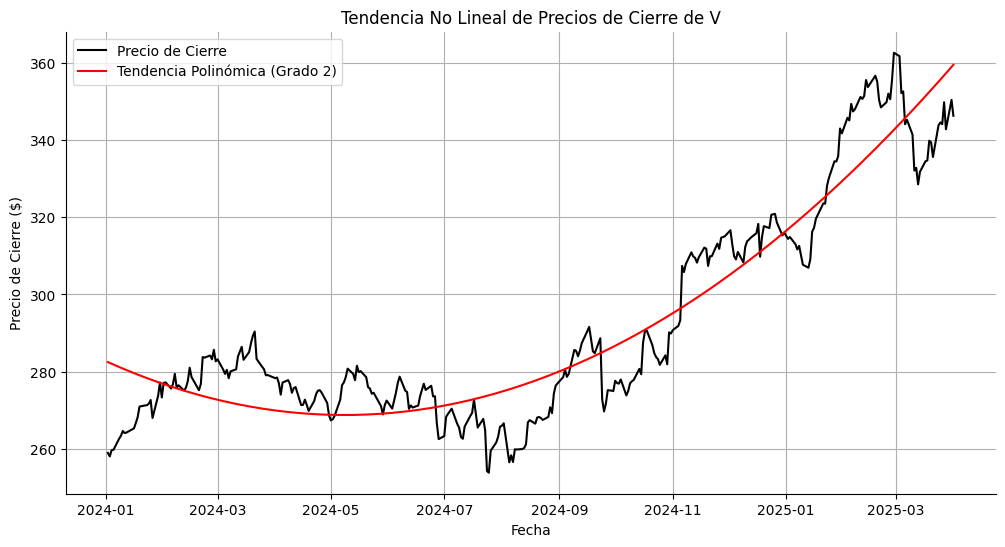

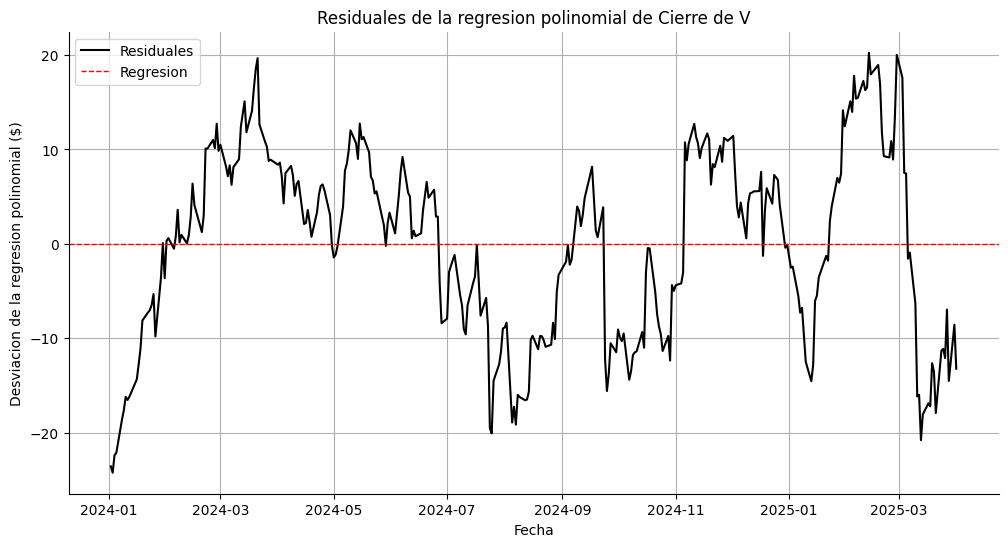

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['V_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='black'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de V') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de V')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La curva polinómica busca modelar la dirección general del precio a lo largo del tiempo, suavizando las fluctuaciones diarias. Se observa que la tendencia del precio de cierre de Visa durante el periodo mostrado (aproximadamente desde enero de 2024 hasta marzo de 2025) presenta una trayectoria no lineal, con una ligera disminución inicial seguida de un crecimiento acelerado a partir de mediados de 2024. La curva de tendencia cuadrática intenta capturar esta dinámica, mostrando una aproximación de la dirección subyacente del precio, aunque con desviaciones en momentos específicos debido a la volatilidad del mercado.


---

Se observa que existen periodos con desviaciones significativas, tanto positivas como negativas, lo que sugiere que la tendencia polinómica no captura perfectamente todas las variaciones del precio real. Hacia el final del periodo, se aprecia un aumento en la magnitud de los residuales, indicando una mayor discrepancia entre el modelo y los datos observados. En general, la gráfica revela que, si bien la tendencia polinómica puede ofrecer una visión general, existen errores considerables en su capacidad para predecir el precio de cierre diario de Visa.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF (residuales):', adf_test[0])
print('p-value (residuales):', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF (residuales): -2.5172592053757135
p-value (residuales): 0.11133124840469316
La tendencia no es estacionaria (aceptamos la hipótesis nula).


Esto sugiere que los errores del modelo de regresión polinomial aún contienen algún tipo de patrón o dependencia temporal que el modelo no ha capturado completamente. Idealmente, los residuales de un buen modelo deberían comportarse como ruido blanco, es decir, ser estacionarios y no autocorrelacionados. El hecho de que los residuales no sean estacionarios podría indicar que el modelo polinomial de grado 2 no es suficiente para describir completamente la dinámica de los precios de cierre de Visa.

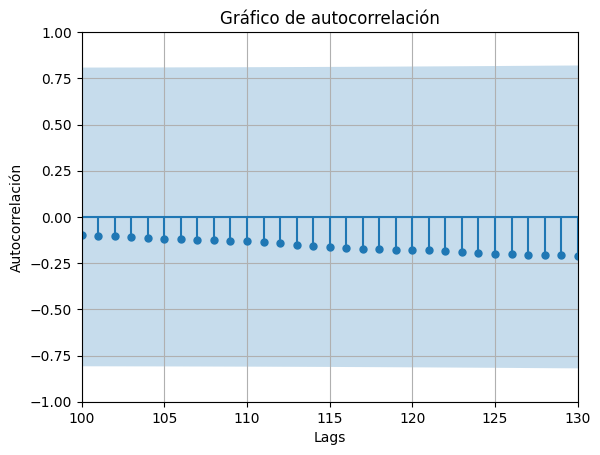

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['V_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

Las barras verticales representan el coeficiente de autocorrelación para cada rezago, y el área sombreada indica las bandas de confianza (generalmente al 95%). En esta gráfica, se observa que todas las barras de autocorrelación para los rezagos mostrados se encuentran dentro de las bandas de confianza. Esto sugiere que no hay una autocorrelación estadísticamente significativa en la serie temporal para estos rezagos específicos. En otras palabras, para los rezagos entre 100 y 130, los valores de la serie no están significativamente correlacionados con sus valores pasados en esos intervalos de tiempo.

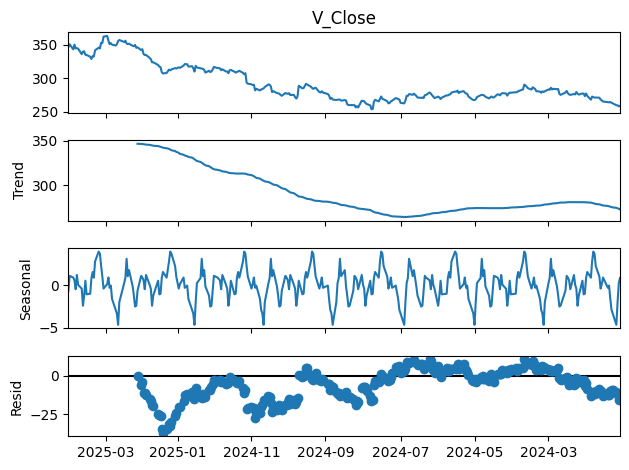

In [ ]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['V_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

El panel superior presenta la serie original, mientras que los paneles inferiores muestran la tendencia subyacente, la componente estacional y los residuos. Se observa una tendencia general a la baja a lo largo del periodo analizado, con fluctuaciones estacionales de menor magnitud que se repiten de manera regular. Los residuos representan la parte de la serie que no se explica por la tendencia ni la estacionalidad, mostrando variaciones irregulares alrededor de cero. En conjunto, esta descomposición permite visualizar cómo diferentes componentes contribuyen al comportamiento del precio de cierre de Visa durante el periodo examinado.

In [ ]:
#1.Seleccionar una marca y obtener los datos:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='MA',            # tickers: MA: 	MasterCard. Common Stock
    start='2024-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,MA_Open,MA_High,MA_Low,MA_Close,MA_Adj Close,MA_Volume
Date,,,,,,
2024-01-02,424.089996,424.279999,419.559998,421.890015,418.183075,2463700
2024-01-03,421.200012,421.339996,417.500000,418.769989,415.090424,3093700
2024-01-04,418.500000,423.450012,418.279999,419.769989,416.081635,2042600
2024-01-05,420.489990,422.760010,416.989990,419.420013,415.734711,2415900
2024-01-08,419.440002,422.079987,416.529999,421.980011,418.931458,2125400
...,...,...,...,...,...,...
2025-03-25,545.950012,547.179993,542.000000,545.159973,544.296692,2138200
2025-03-26,547.140015,551.030029,545.119995,549.070007,548.200500,2681600
2025-03-27,549.070007,561.830017,547.799988,557.570007,556.687073,2901200


In [ ]:
pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = '0G16GIZ6K04UHXKJ'   # esta es mía, no la uses o habrá problemas
#Clave AZENETH
# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de AAPL
ticker = 'MA'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,MA_Open,MA_High,MA_Low,MA_Close,MA_Volume
date,,,,,
2025-04-01,546.800,551.1536,544.0000,548.51,2714883.0
2025-03-31,532.160,551.4300,531.0200,548.12,4741966.0
2025-03-28,554.225,558.5900,540.0900,540.61,2656767.0
2025-03-27,549.070,561.8300,547.8000,557.57,2901339.0
2025-03-26,547.140,551.0300,545.1187,549.07,2681705.0
...,...,...,...,...,...
2024-01-08,419.440,422.0800,416.5300,421.98,2125446.0
2024-01-05,420.490,422.7600,416.9900,419.42,2344216.0
2024-01-04,418.500,423.4500,418.2800,419.77,2042551.0


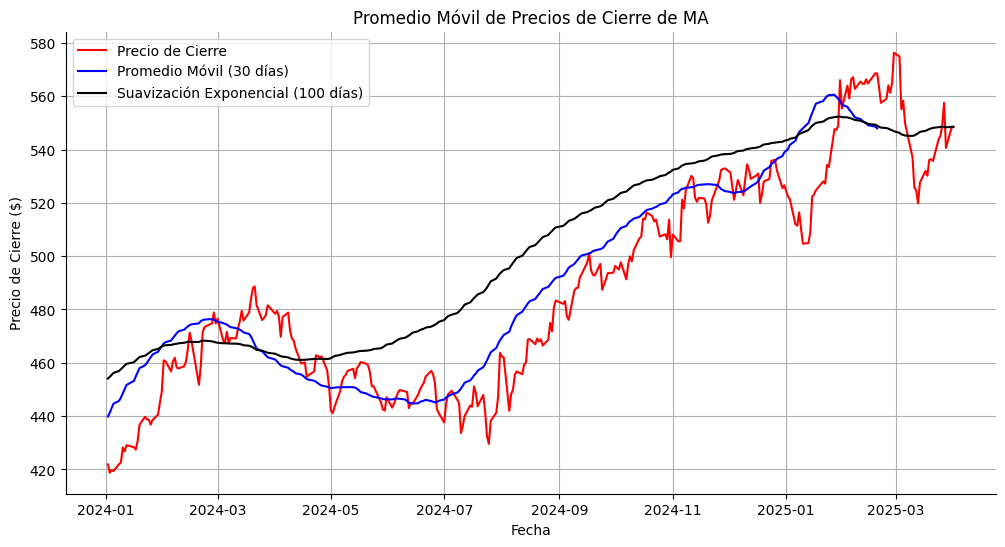

In [ ]:
#Graficar la serie de tiempo:
# Promedio Móvil Simple
ventana_sma = 30
df['SMA'] = df['MA_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['MA_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['MA_Close'], label='Precio de Cierre', color='red')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='blue')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='black')
plt.title('Promedio Móvil de Precios de Cierre de MA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

El precio de cierre (línea roja) exhibe fluctuaciones diarias, mientras que el promedio móvil de 30 días (línea azul) suaviza estas variaciones, proporcionando una visión de la tendencia a corto plazo. La suavización exponencial de 100 días (línea negra) ofrece una perspectiva de la tendencia a medio plazo, siendo menos sensible a los movimientos diarios. En general, se observa una tendencia alcista para Mastercard durante la mayor parte del periodo, con correcciones temporales que se reflejan en los cruces del precio con el promedio móvil de 30 días. La suavización exponencial de 100 días respalda esta tendencia alcista subyacente.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['MA_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.0621999876540995
p-value: 0.7299084086814206
La tendencia no es estacionaria (aceptamos la hipótesis nula).


El Estadístico ADF obtenido es de -1.0622, y el p-value asociado es de 0.7299. La conclusión basada en este p-value, que es mayor que el nivel de significancia comúnmente utilizado de 0.05, es que la tendencia no es estacionaria. Esto implica que no se rechaza la hipótesis nula de la prueba, que establece que la serie temporal tiene una raíz unitaria, lo cual es una característica de las series no estacionarias. Por lo tanto, la serie analizada probablemente tiene propiedades estadísticas que varían con el tiempo.

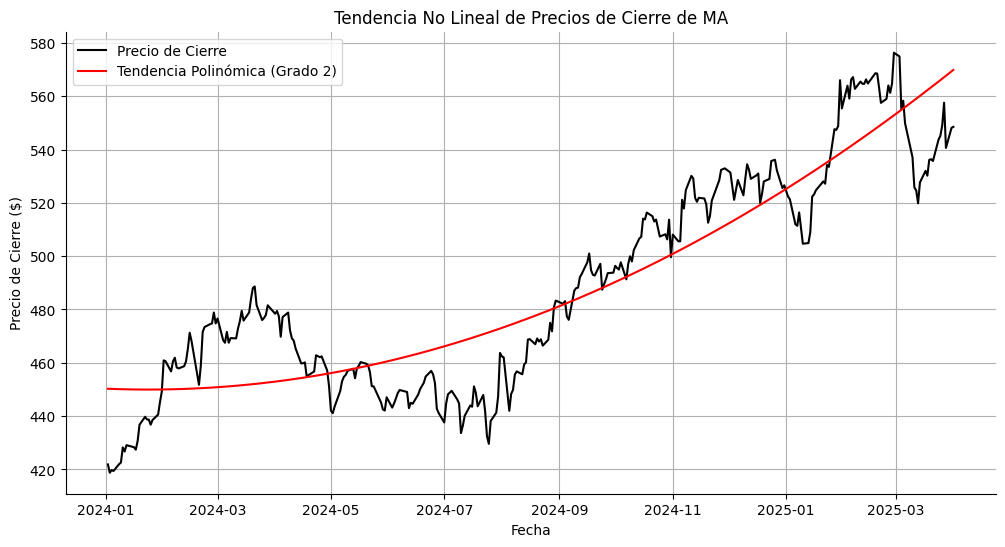

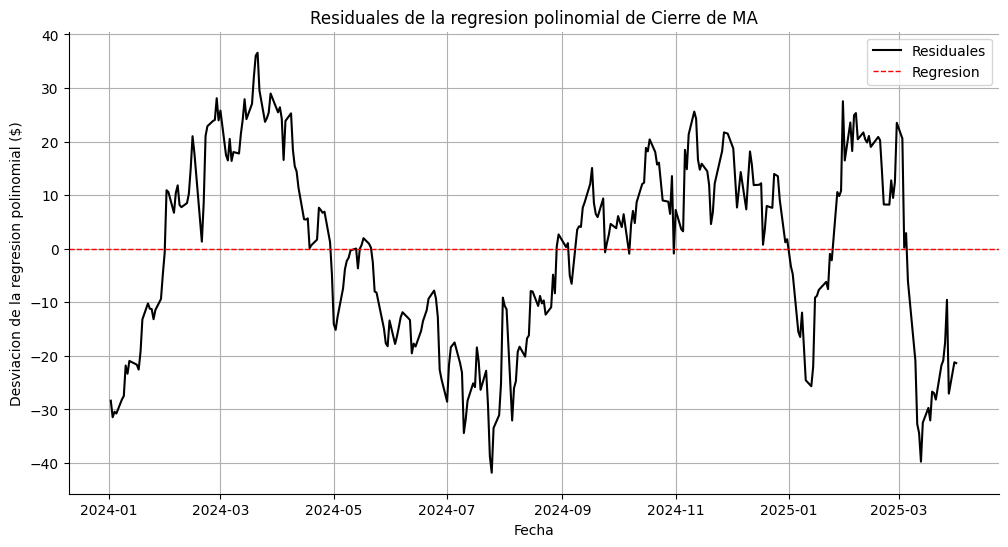

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['MA_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='black'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de MA') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de MA')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Presenta la evolución del precio de cierre de las acciones de Mastercard (línea negra) junto con una tendencia polinómica de grado 2 ajustada a estos precios (línea roja). La curva polinómica busca modelar la dirección general del precio a lo largo del tiempo, suavizando las fluctuaciones diarias. Se observa que la tendencia del precio de cierre de Mastercard durante el periodo mostrado (aproximadamente desde enero de 2024 hasta marzo de 2025) exhibe una trayectoria no lineal, con una fase inicial de relativa estabilidad seguida de un crecimiento acelerado a partir de mediados de 2024. La curva de tendencia cuadrática intenta capturar este movimiento, mostrando una aproximación de la dirección subyacente del precio, aunque con desviaciones en momentos específicos debido a la volatilidad del mercado.


---

Muestra la diferencia entre el precio de cierre real de Mastercard y los valores predichos por la tendencia polinómica de grado 2 (línea negra) a lo largo del tiempo, con la línea roja punteada en cero representando la línea de la regresión. Los residuales fluctúan alrededor de cero, indicando la magnitud y dirección de los errores del modelo. Se observa que existen periodos con desviaciones considerables, tanto positivas como negativas, lo que sugiere que la tendencia polinómica no captura perfectamente todas las variaciones del precio real. Hacia mediados de 2024 y a principios de 2025, se aprecian desviaciones más amplias, indicando una menor precisión del modelo en esos momentos. En general, la gráfica revela que, si bien la tendencia polinómica puede ofrecer una visión general, existen errores significativos en su capacidad para predecir el precio de cierre diario de Mastercard.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF (residuales):', adf_test[0])
print('p-value (residuales):', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF (residuales): -2.5603422387408483
p-value (residuales): 0.10147381447867193
La tendencia no es estacionaria (aceptamos la hipótesis nula).


El Estadístico ADF obtenido para los residuales es -2.5603, y el p-value asociado es 0.1015. La conclusión, basada en la comparación de este p-value con un nivel de significancia comúnmente utilizado de 0.05, es que la tendencia de los residuales no es estacionaria, lo que lleva a aceptar la hipótesis nula de la prueba ADF. Esto sugiere que los errores del modelo aún contienen algún patrón o dependencia temporal que el modelo no ha explicado completamente, indicando que el modelo podría no ser una representación totalmente adecuada de la dinámica de la serie temporal subyacente.

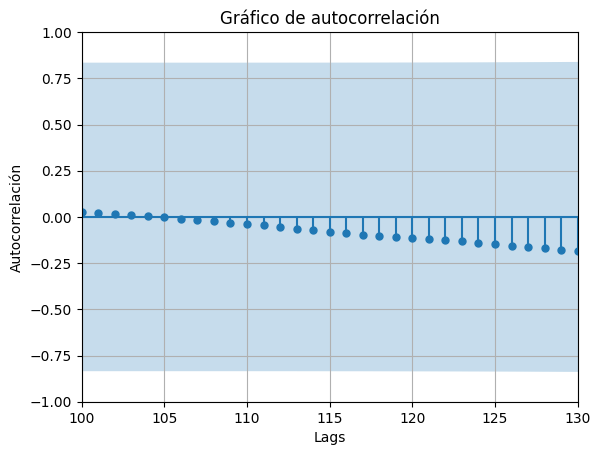

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['MA_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

Las barras verticales representan el coeficiente de autocorrelación para cada rezago, y el área sombreada indica las bandas de confianza (generalmente al 95%). En esta gráfica, se observa que todas las barras de autocorrelación para los rezagos mostrados se encuentran dentro de las bandas de confianza. Esto sugiere que no hay una autocorrelación estadísticamente significativa en la serie temporal para estos rezagos específicos. En otras palabras, para los rezagos entre 100 y 130, los valores de la serie no están significativamente correlacionados con sus valores pasados en esos intervalos de tiempo.

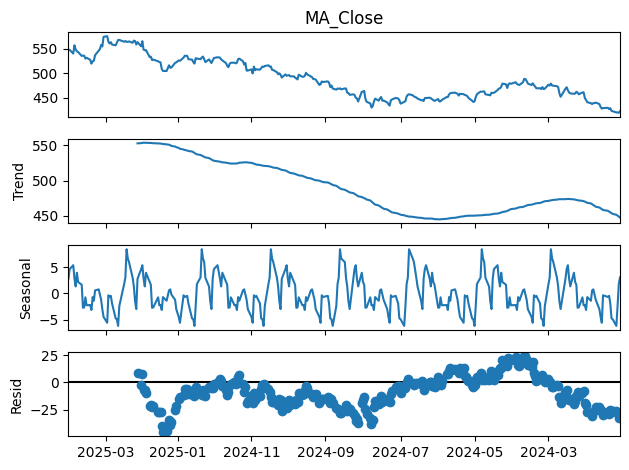

In [ ]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['MA_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

El panel superior presenta la serie original, mientras que los paneles inferiores muestran la tendencia subyacente, la componente estacional y los residuos. Se observa una tendencia general a la baja a lo largo del periodo analizado, con fluctuaciones estacionales de menor magnitud que se repiten de manera regular. Los residuos representan la parte de la serie que no se explica por la tendencia ni la estacionalidad, mostrando variaciones irregulares alrededor de cero. En conjunto, esta descomposición permite visualizar cómo diferentes componentes contribuyen al comportamiento del precio de cierre de Mastercard durante el periodo examinado.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['MSFTL', 'MA'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2015-01-01',        # Fecha de inicio
    end='2018-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df


[*********************100%***********************]  2 of 2 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFTL']: HTTPError('HTTP Error 404: ')


,MA_Open,MA_High,MA_Low,MA_Close,MA_Adj Close,MA_Volume,MSFTL_Open,MSFTL_High,MSFTL_Low,MSFTL_Close,MSFTL_Adj Close,MSFTL_Volume
Date,,,,,,,,,,,,
2015-01-02,86.680000,87.360001,84.919998,85.680000,80.319962,4505800,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,85.290001,85.349998,83.050003,83.269997,78.060738,6441400,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,83.660004,83.779999,81.800003,83.089996,77.891991,7690000,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,84.099998,84.279999,83.070000,84.220001,79.103615,5846800,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,85.190002,85.620003,85.029999,85.529999,80.334038,5174200,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,150.940002,151.520004,150.309998,150.850006,144.648254,1892300,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-26,150.580002,151.339996,149.889999,151.279999,145.060547,1200700,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-27,151.559998,151.779999,151.100006,151.399994,145.175613,1730200,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pip install alpha_vantage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['MSFT', 'MA'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-01-01',        # Fecha de inicio
    end='2025-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  2 of 2 completed


,MA_Open,MA_High,MA_Low,MA_Close,MA_Adj Close,MA_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume
Date,,,,,,,,,,,,
2024-01-02,424.089996,424.279999,419.559998,421.890015,418.183075,2463700,373.859985,375.899994,366.769989,370.869995,367.380615,25258600
2024-01-03,421.200012,421.339996,417.500000,418.769989,415.090424,3093700,369.010010,373.260010,368.510010,370.600006,367.113129,23083500
2024-01-04,418.500000,423.450012,418.279999,419.769989,416.081635,2042600,370.670013,373.100006,367.170013,367.940002,364.478180,20901500
2024-01-05,420.489990,422.760010,416.989990,419.420013,415.734711,2415900,368.970001,372.059998,366.500000,367.750000,364.289948,20987000
2024-01-08,419.440002,422.079987,416.529999,421.980011,418.931458,2125400,369.299988,375.200012,369.010010,374.690002,371.164673,23134000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,529.270020,535.739990,527.830017,535.710022,534.074524,955000,434.649994,439.600006,434.190002,439.329987,438.450836,7164500
2024-12-26,533.630005,537.700012,532.919983,536.150024,534.513184,1109600,439.079987,440.940002,436.630005,438.109985,437.233276,8194200
2024-12-27,533.609985,537.559998,530.799988,532.200012,530.575256,1541800,434.600006,435.220001,426.350006,430.529999,429.668457,18117700


In [ ]:
pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Tu clave de API
my_key = '0G16GIZ6K04UHXKJ'  # reemplaza por la tuya

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Función para obtener y renombrar datos de un ticker
def get_stock_data(ticker):
    data, meta = ts.get_daily(symbol=ticker, outputsize='full')
    data.columns = [f'{ticker}_{col}' for col in ['Open', 'High', 'Low', 'Close', 'Volume']]
    return data

# Descargar datos de cada acción
data_msft = get_stock_data('V')
data_aapl = get_stock_data('MA')

# Unirlos por el índice (fecha)
df = pd.concat([data_msft, data_aapl], axis=1)

# Filtrar por rango de fechas
inicio = '2024-01-01'
fin = '2025-04-01'
df = df[(df.index >= inicio) & (df.index <= fin)]

# Opcional: ordenar por fecha ascendente
df = df.sort_index()

df.head()

,V_Open,V_High,V_Low,V_Close,V_Volume,MA_Open,MA_High,MA_Low,MA_Close,MA_Volume
date,,,,,,,,,,
2024-01-02,259.61,260.0900,257.67,258.87,5470986.0,424.09,424.28,419.5600,421.89,2463746.0
2024-01-03,258.55,258.8600,256.86,257.98,4148294.0,421.20,421.34,417.5001,418.77,3093684.0
2024-01-04,258.07,261.0400,258.00,259.61,3842976.0,418.50,423.45,418.2800,419.77,2042551.0
2024-01-05,260.78,261.4599,258.75,259.69,3723363.0,420.49,422.76,416.9900,419.42,2344216.0
2024-01-08,260.94,262.6200,259.95,262.54,4659030.0,419.44,422.08,416.5300,421.98,2125446.0


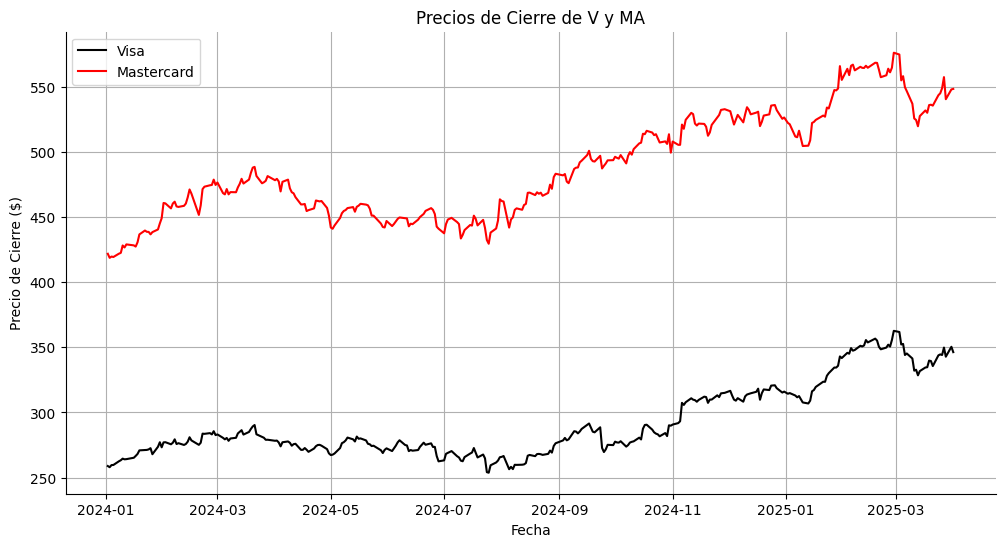

In [ ]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['V_Close'], label="Visa", color='black')
plt.plot(df['MA_Close'], label='Mastercard', color='red')
plt.title('Precios de Cierre de V y MA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Se observa que Mastercard cotiza a un precio significativamente mayor que Visa durante todo el periodo. Ambas acciones muestran una tendencia general alcista a lo largo del tiempo, aunque con diferentes patrones de volatilidad. Visa experimenta un crecimiento más constante y gradual, mientras que Mastercard presenta fluctuaciones más pronunciadas, especialmente en la segunda mitad del periodo. Hacia el final de la gráfica, ambas acciones muestran cierta volatilidad, pero mantienen niveles superiores a los del inicio del periodo. En resumen, ambas empresas del sector de procesamiento de pagos muestran un rendimiento positivo en sus precios de cierre durante el lapso analizado, con Mastercard operando a un precio más alto y exhibiendo mayor volatilidad en comparación con el crecimiento más estable de Visa.



In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['V_Close', 'MA_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5044  , p=0.4781  , df_denom=309, df_num=1
ssr based chi2 test:   chi2=0.5093  , p=0.4755  , df=1
likelihood ratio test: chi2=0.5089  , p=0.4756  , df=1
parameter F test:         F=0.5044  , p=0.4781  , df_denom=309, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3068  , p=0.7360  , df_denom=306, df_num=2
ssr based chi2 test:   chi2=0.6237  , p=0.7321  , df=2
likelihood ratio test: chi2=0.6231  , p=0.7323  , df=2
parameter F test:         F=0.3068  , p=0.7360  , df_denom=306, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2246  , p=0.8792  , df_denom=303, df_num=3
ssr based chi2 test:   chi2=0.6895  , p=0.8757  , df=3
likelihood ratio test: chi2=0.6887  , p=0.8759  , df=3
parameter F test:         F=0.2246  , p=0.8792  , df_denom=303, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2058  , p=0.9351  

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['V_Close', 'MA_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5044  , p=0.4781  , df_denom=309, df_num=1
ssr based chi2 test:   chi2=0.5093  , p=0.4755  , df=1
likelihood ratio test: chi2=0.5089  , p=0.4756  , df=1
parameter F test:         F=0.5044  , p=0.4781  , df_denom=309, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3068  , p=0.7360  , df_denom=306, df_num=2
ssr based chi2 test:   chi2=0.6237  , p=0.7321  , df=2
likelihood ratio test: chi2=0.6231  , p=0.7323  , df=2
parameter F test:         F=0.3068  , p=0.7360  , df_denom=306, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2246  , p=0.8792  , df_denom=303, df_num=3
ssr based chi2 test:   chi2=0.6895  , p=0.8757  , df=3
likelihood ratio test: chi2=0.6887  , p=0.8759  , df=3
parameter F test:         F=0.2246  , p=0.8792  , df_denom=303, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2058  , p=0.9351  

In [ ]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='MA',            # tickers: MA: Mastercard
    start='2024-01-01',        # Fecha de inicio
    end='2025-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed


,MA_Open,MA_High,MA_Low,MA_Close,MA_Adj Close,MA_Volume
Date,,,,,,
2024-01-02,424.089996,424.279999,419.559998,421.890015,418.183075,2463700
2024-01-03,421.200012,421.339996,417.500000,418.769989,415.090424,3093700
2024-01-04,418.500000,423.450012,418.279999,419.769989,416.081635,2042600
2024-01-05,420.489990,422.760010,416.989990,419.420013,415.734711,2415900
2024-01-08,419.440002,422.079987,416.529999,421.980011,418.931458,2125400
...,...,...,...,...,...,...
2024-12-24,529.270020,535.739990,527.830017,535.710022,534.074524,955000
2024-12-26,533.630005,537.700012,532.919983,536.150024,534.513184,1109600
2024-12-27,533.609985,537.559998,530.799988,532.200012,530.575256,1541800


In [ ]:
!pip install prophet

In [ ]:
df

,V_Open,V_High,V_Low,V_Close,V_Volume,MA_Open,MA_High,MA_Low,MA_Close,MA_Volume
date,,,,,,,,,,
2024-01-02,259.61,260.0900,257.670,258.87,5470986.0,424.090,424.2800,419.5600,421.89,2463746.0
2024-01-03,258.55,258.8600,256.860,257.98,4148294.0,421.200,421.3400,417.5001,418.77,3093684.0
2024-01-04,258.07,261.0400,258.000,259.61,3842976.0,418.500,423.4500,418.2800,419.77,2042551.0
2024-01-05,260.78,261.4599,258.750,259.69,3723363.0,420.490,422.7600,416.9900,419.42,2344216.0
2024-01-08,260.94,262.6200,259.950,262.54,4659030.0,419.440,422.0800,416.5300,421.98,2125446.0
...,...,...,...,...,...,...,...,...,...,...
2025-03-26,345.99,347.3800,343.000,344.18,6187574.0,547.140,551.0300,545.1187,549.07,2681705.0
2025-03-27,344.00,350.8400,343.320,349.86,7254807.0,549.070,561.8300,547.8000,557.57,2901339.0
2025-03-28,349.19,351.6150,341.605,342.85,5687616.0,554.225,558.5900,540.0900,540.61,2656767.0


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgafq82e6/9o3areq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgafq82e6/6naylic3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74393', 'data', 'file=/tmp/tmpgafq82e6/9o3areq1.json', 'init=/tmp/tmpgafq82e6/6naylic3.json', 'output', 'file=/tmp/tmpgafq82e6/prophet_modelr1y7869u/prophet_model-20250514032652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:26:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:26:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


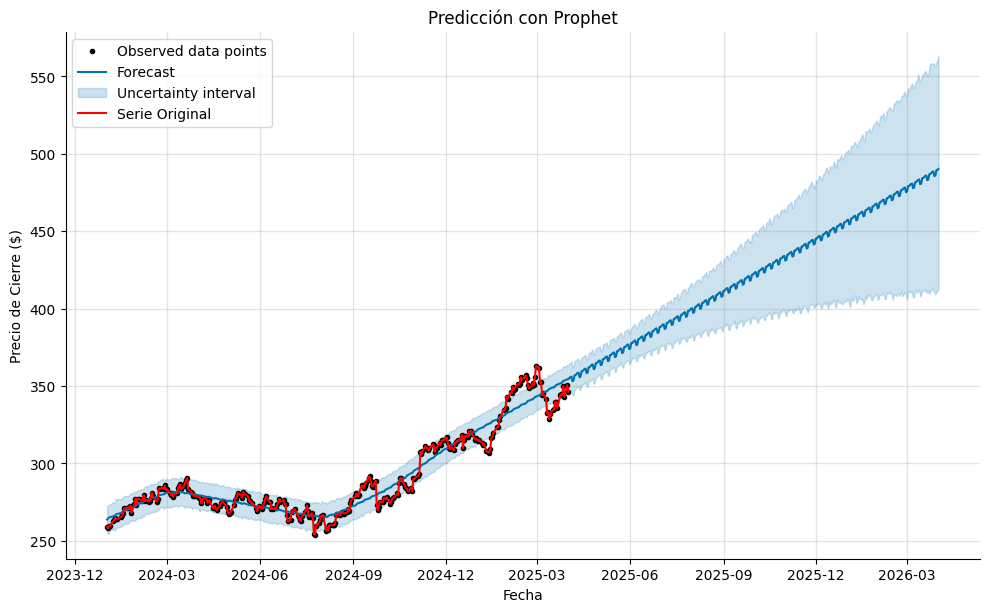

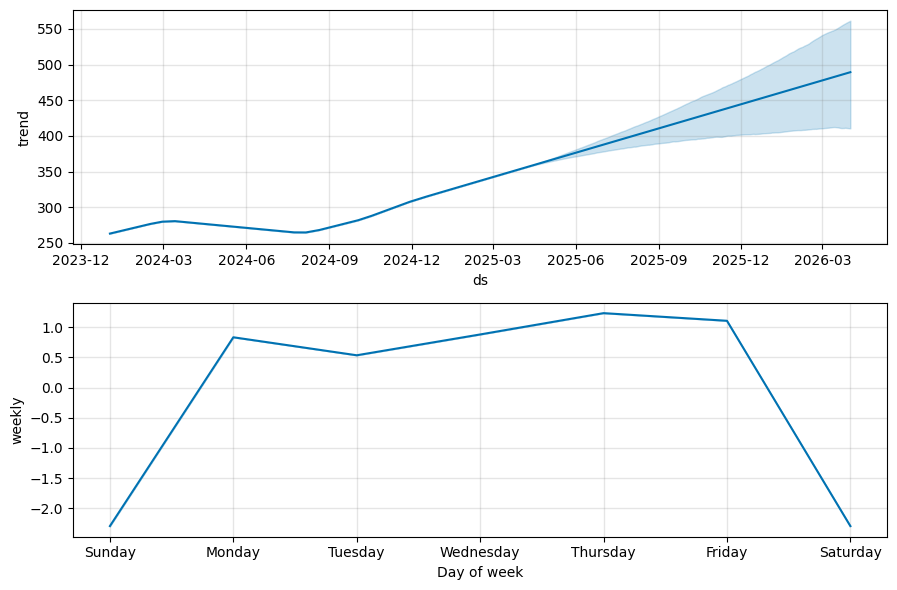

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['V_Close'].reset_index().rename(columns={'date': 'ds', 'V_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['V_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgafq82e6/rbkecky2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgafq82e6/va1lpp5v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78734', 'data', 'file=/tmp/tmpgafq82e6/rbkecky2.json', 'init=/tmp/tmpgafq82e6/va1lpp5v.json', 'output', 'file=/tmp/tmpgafq82e6/prophet_model6zfzpwo7/prophet_model-20250514032735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:27:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:27:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


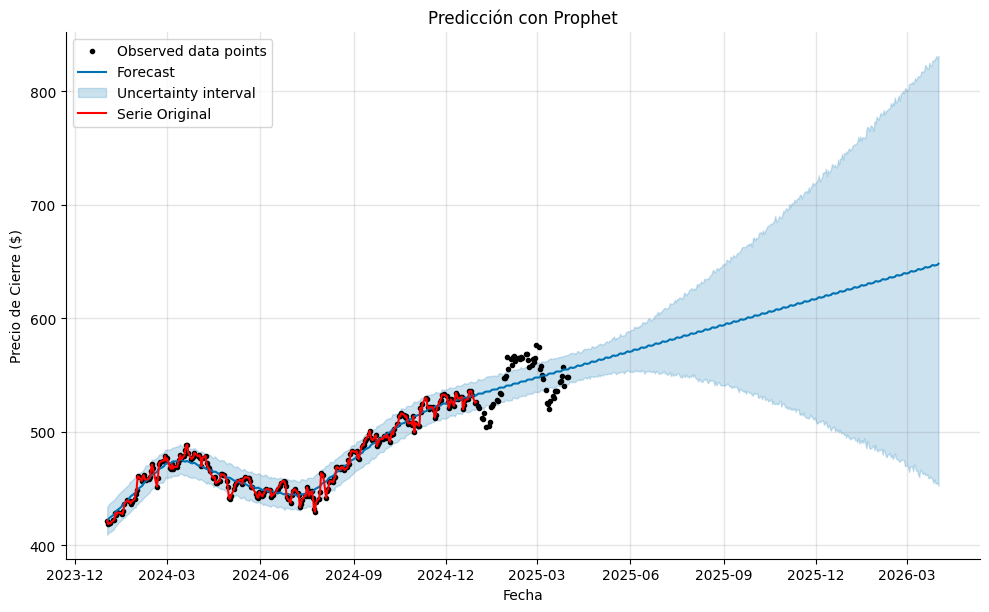

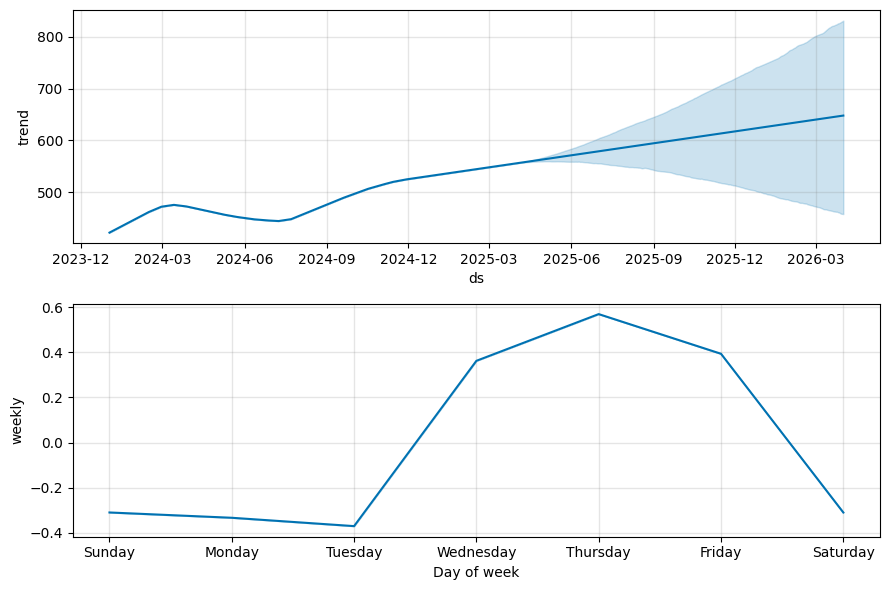

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['MA_Close'].reset_index().rename(columns={'date': 'ds', 'MA_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['MA_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

# Resultados

Considerando el análisis realizado sobre los precios de cierre de Visa (V) y Mastercard (MA) desde inicios de 2024 hasta abril de 2025, se observa una tendencia general alcista para ambas acciones, aunque con diferentes magnitudes y niveles de volatilidad, siendo Mastercard la de mayor precio y fluctuación. El análisis de promedios móviles y suavización exponencial confirma esta tendencia subyacente a medio plazo. Las pruebas de estacionariedad (ADF) aplicadas a las series de precios indicaron que no son estacionarias, lo que sugiere la necesidad de transformaciones para ciertos modelos. La descomposición de series temporales reveló una tendencia subyacente creciente y una componente estacional de menor magnitud en ambas acciones. Al ajustar una tendencia polinómica de grado 2, se capturó la naturaleza no lineal del crecimiento, aunque los residuales mostraron desviaciones significativas, indicando que este modelo simple no explica completamente la dinámica diaria. Las pruebas de autocorrelación en los residuales no mostraron una autocorrelación significativa para rezagos más largos. Finalmente, la prueba de causalidad de Granger aplicada a los residuales de los modelos polinómicos no arrojó evidencia concluyente de una influencia predictiva significativa entre los errores de predicción de ambas acciones. En resumen, aunque ambas empresas muestran un crecimiento general en el precio de sus acciones, su dinámica diaria presenta variaciones no completamente capturadas por modelos simples, y no se encontró una fuerte relación causal lineal entre los errores de predicción basados en tendencias polinómicas.

# Conclusión

Durante el análisis de los precios de cierre de Visa (V) y Mastercard (MA) entre inicios de 2024 y abril de 2025 revela una tendencia alcista predominante para ambas acciones, si bien con perfiles de volatilidad distintos, siendo Mastercard la de mayor cotización y fluctuación. Si bien se identificaron tendencias no lineales y componentes estacionales de menor influencia, los modelos de tendencia polinómica de segundo grado no lograron capturar completamente la variabilidad diaria de los precios, como se evidencia en los residuales no estacionarios. La ausencia de autocorrelación significativa en los residuales para rezagos más amplios sugiere que los errores de predicción a largo plazo no están directamente relacionados con sus propios valores pasados lejanos. Finalmente, la prueba de causalidad de Granger aplicada a los residuales no proporcionó evidencia sólida de una influencia predictiva lineal significativa entre los errores de predicción de ambas acciones. Esto sugiere que, si bien ambas empresas operan en el mismo sector, sus movimientos diarios de precios, una vez extraída la tendencia general, podrían estar influenciados por factores idiosincrásicos más que por una causalidad lineal directa entre sus errores de modelado basados en tendencias polinómicas simples. Para una comprensión más profunda de la interdependencia entre Visa y Mastercard, se requerirían modelos más sofisticados que incorporen otros factores económicos y financieros relevantes.